In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from IPython.display import display
import math

from collections import Counter
from pymystem3 import Mystem

import swifter

import string
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
df=pd.read_json("..\\data\\raw\\SamT4lUk.json", lines=True)
df

,title,text,tags,comment_texts,comment__authors,other,comment_dates,breadcrumps,ctime,curl
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый.... подскажите пожалуйста, в чем причин...","[Kia, Sorento, 2013, 2 поколение, рестайлинг, ...","[Добрый. Нет, это не катализатор, если проблем...","[autobazar86, Dr2001]","[18.06.2020, 19129157, 38]","[18.06.2020, 18.06.2020]","[Дром, Вопросы и Ответы, Kia, Sorento]",1592523125,https://www.drom.ru/faq/kia/sorento/Dobriy-pod...
1,Как снять впускной колектор на икстрейле двс Q...,Как снять впускной колектор на икстрейле двс Q...,"[Nissan, X-Trail, 2005, 1 поколение, рестайлин...",[Ручками и инструментом! Или обращаются в Серв...,[autobazar86],"[18.06.2020, , 38]",[18.06.2020],"[Дром, Вопросы и Ответы, Nissan, X-Trail]",1592523125,https://www.drom.ru/faq/nissan/x-trail/Kak-sny...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"[Volkswagen, Golf, 2007, 5 поколение, 1.6 л, Б...","[Здравствуйте. Ну, можно попробовать поставить...",[autobazar86],"[18.06.2020, , 14]",[18.06.2020],"[Дром, Вопросы и Ответы, Volkswagen, Golf]",1592523125,https://www.drom.ru/faq/volkswagen/golf/ZDRAVS...
3,"Не работает сенсор на управление кондицианера,...","Не работает сенсор на управление кондицианера,...","[Toyota, Crown, 2001, 11 поколение, рестайлинг...",NaN,NaN,"[17.06.2020, , 178]",NaN,"[Дром, Вопросы и Ответы, Toyota, Crown]",1592523125,https://www.drom.ru/faq/toyota/crown/Ne-rabota...
4,"Неработает сенсор монитора управления печкой, ...","Неработает сенсор монитора управления печкой, ...","[Toyota, Crown, 2000, 11 поколение, 2.5 л, Бен...",[Прочитал на одном форуме интересное правило: ...,[autobazar86],"[17.06.2020, 11925916, 31]",[18.06.2020],"[Дром, Вопросы и Ответы, Toyota, Crown]",1592523125,https://www.drom.ru/faq/toyota/crown/Nerabotae...
...,...,...,...,...,...,...,...,...,...,...
49971,Откуда вибрация впуска 2NZ-FE?,Приветствую!\n\nОн так и должен работать или э...,"[Toyota, ist, двигатель]","[Короб фильтра подтяни и забей. Это норм, Поду...","[fishtank, БалероэндКраковяка, fishtank, ASD-Z...","[01.02.2014, 86]","[01.02.2014, 01.02.2014, 01.02.2014, 01.02.201...","[Дром, Вопросы и Ответы, Toyota, ist]",1592581754,https://www.drom.ru/faq/toyota/ist/Otkuda-vibr...
49972,Отчего моргает лампочка двигателя на Авенсис В...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,"[Toyota, Avensis Verso, двигатель]",[И Вам здравствовать!\nСкорее всего не было ко...,"[CanMan, CanMan, igorrem]","[31.01.2014, 39]","[31.01.2014, 31.01.2014, 31.01.2014]","[Дром, Вопросы и Ответы, Toyota, Avensis Verso]",1592581754,https://www.drom.ru/faq/toyota/avensis_verso/O...
49973,"Почему АКПП то пинается, то нет на старом блок...","Досталася Ипсум 2002гв 2,4л\nИ так по порядку....","[Toyota, Ipsum, трансмиссия]",[И Вам доброго!\n1. Одному Богу известно.\n2. ...,"[CanMan, CanMan, remza.max, Mityanich]","[31.01.2014, 13]","[31.01.2014, 31.01.2014, 31.01.2014, 01.02.2014]","[Дром, Вопросы и Ответы, Toyota, Ipsum]",1592581756,https://www.drom.ru/faq/toyota/ipsum/Pochemu-A...
49974,Какие чаще всего проблемы беспокоят у Нивы 2121?,"Так то в машинах разбираюсь, но хочу спросить ...","[Лада, 4x4 2121 Нива, общие вопросы]",[666_Ghost-Basters_666;1 151106709:говорят пер...,"[TOY_302, -vk-]","[31.01.2014, 313]","[02.02.2014, 06.04.2017]","[Дром, Вопросы и Ответы, Лада, 4x4 2121 Нива]",1592581757,https://www.drom.ru/faq/lada/2121_4x4_niva/Kak...


<h3>So, we want to get pairs problem-solution. Our problem could be in the "title" or in the "text" column (or both) and solution could be in the "comment_texts" column.

In [3]:
df_processed=df.iloc[:,[0,1,3]]
df_processed

,title,text,comment_texts
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый.... подскажите пожалуйста, в чем причин...","[Добрый. Нет, это не катализатор, если проблем..."
1,Как снять впускной колектор на икстрейле двс Q...,Как снять впускной колектор на икстрейле двс Q...,[Ручками и инструментом! Или обращаются в Серв...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"[Здравствуйте. Ну, можно попробовать поставить..."
3,"Не работает сенсор на управление кондицианера,...","Не работает сенсор на управление кондицианера,...",NaN
4,"Неработает сенсор монитора управления печкой, ...","Неработает сенсор монитора управления печкой, ...",[Прочитал на одном форуме интересное правило: ...
...,...,...,...
49971,Откуда вибрация впуска 2NZ-FE?,Приветствую!\n\nОн так и должен работать или э...,"[Короб фильтра подтяни и забей. Это норм, Поду..."
49972,Отчего моргает лампочка двигателя на Авенсис В...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,[И Вам здравствовать!\nСкорее всего не было ко...
49973,"Почему АКПП то пинается, то нет на старом блок...","Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",[И Вам доброго!\n1. Одному Богу известно.\n2. ...
49974,Какие чаще всего проблемы беспокоят у Нивы 2121?,"Так то в машинах разбираюсь, но хочу спросить ...",[666_Ghost-Basters_666;1 151106709:говорят пер...


<h3>We will merge all problems and all solutions to one string.

In [4]:
#isnan for nullable strings and lists
def isnan(value):
    try:
        return math.isnan(float(value))
    except:
        return False


def merge_title_text(x):
    title=x.title
    text=x.text

    if(title==text and title==""):
        return np.NaN
    if(isnan(title)):
        return text
    if(isnan(text)):
        return title


    if(title==text):
        return text
    
    return text+" "+title

def merge_comment_texts(x):
    ct=x.comment_texts
    if(isnan(ct)):
        return np.NaN

    if(len(ct)==0):
        return np.NaN
    
    res=""
    for i in range(len(ct)):
        res+=ct[i]+" "

    return res

df_processed["problem"]=df_processed.apply(merge_title_text,axis=1)
df_processed["solution"]=df_processed.apply(merge_comment_texts,axis=1)
df_processed

C:\Users\Oleg\AppData\Local\Temp/ipykernel_6596/2922967186.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed["problem"]=df_processed.apply(merge_title_text,axis=1)
C:\Users\Oleg\AppData\Local\Temp/ipykernel_6596/2922967186.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed["solution"]=df_processed.apply(merge_comment_texts,axis=1)


,title,text,comment_texts,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый.... подскажите пожалуйста, в чем причин...","[Добрый. Нет, это не катализатор, если проблем...","Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Как снять впускной колектор на икстрейле двс Q...,[Ручками и инструментом! Или обращаются в Серв...,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"[Здравствуйте. Ну, можно попробовать поставить...",ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
3,"Не работает сенсор на управление кондицианера,...","Не работает сенсор на управление кондицианера,...",NaN,"Не работает сенсор на управление кондицианера,...",NaN
4,"Неработает сенсор монитора управления печкой, ...","Неработает сенсор монитора управления печкой, ...",[Прочитал на одном форуме интересное правило: ...,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
...,...,...,...,...,...
49971,Откуда вибрация впуска 2NZ-FE?,Приветствую!\n\nОн так и должен работать или э...,"[Короб фильтра подтяни и забей. Это норм, Поду...",Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...
49972,Отчего моргает лампочка двигателя на Авенсис В...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,[И Вам здравствовать!\nСкорее всего не было ко...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...
49973,"Почему АКПП то пинается, то нет на старом блок...","Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",[И Вам доброго!\n1. Одному Богу известно.\n2. ...,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...
49974,Какие чаще всего проблемы беспокоят у Нивы 2121?,"Так то в машинах разбираюсь, но хочу спросить ...",[666_Ghost-Basters_666;1 151106709:говорят пер...,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


In [5]:
#drop unecessary columns
df_processed=df_processed.iloc[:,3:5]
df_processed

,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
3,"Не работает сенсор на управление кондицианера,...",NaN
4,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
...,...,...
49971,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...
49972,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...
49973,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...
49974,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


In [6]:
#drop pairs problem-solution w/o problem or solution
df_processed=df_processed.dropna().reset_index(drop=True)
df_processed

,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
3,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
4,На сколько литров топливный бак,55 л
...,...,...
45907,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...
45908,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...
45909,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...
45910,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


In [7]:
#change type of problem and solution series to str
df_processed=df_processed.astype("string")
df_processed

,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
3,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
4,На сколько литров топливный бак,55 л
...,...,...
45907,Приветствую! Он так и должен работать или это...,Короб фильтра подтяни и забей. Это норм Подушк...
45908,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать! Скорее всего не было конт...
45909,"Досталася Ипсум 2002гв 2,4л И так по порядку.....",И Вам доброго! 1. Одному Богу известно. 2. А м...
45910,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


<h3>We will extract brand and model from the "tag" column. Also, some values has car's year in the "tag" column, so we will extract them too.

In [8]:
#get brand and model
df_processed["brand"]=df["tags"].apply(lambda x: x[0])
df_processed["model"]=df["tags"].apply(lambda x: x[1])



#year extraction
years=df["tags"].astype("str").str.extract(r"(?P<year>[\s,'\"][12][0-9]{3,3})")
years=years.year.str.extract(r"(?P<year>[12][0-9]{3,3})")

#I just can't extract nan values somehow else, dunno why
years=years.year.astype("float")
years=years.astype("Int64")

years[(years<1970)|(years>2022)]=np.NaN
display(years)

df_processed["year"]=years

0        2013
1        2005
2        2007
3        2001
4        2000
         ... 
49971    <NA>
49972    <NA>
49973    <NA>
49974    <NA>
49975    <NA>
Name: year, Length: 49976, dtype: Int64

In [9]:
print(df_processed.shape)
display(df_processed.dtypes)
df_processed

(45912, 5)


problem     string
solution    string
brand       object
model       object
year         Int64
dtype: object

,problem,solution,brand,model,year
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема...",Kia,Sorento,2013
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...,Nissan,X-Trail,2005
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ...",Volkswagen,Golf,2007
3,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""...",Toyota,Crown,2001
4,На сколько литров топливный бак,55 л,Toyota,Crown,2000
...,...,...,...,...,...
45907,Приветствую! Он так и должен работать или это...,Короб фильтра подтяни и забей. Это норм Подушк...,Nissan,Avenir,1997
45908,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать! Скорее всего не было конт...,BMW,3-Series,2004
45909,"Досталася Ипсум 2002гв 2,4л И так по порядку.....",И Вам доброго! 1. Одному Богу известно. 2. А м...,Mitsubishi,Colt,2003
45910,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...,Лада,2112,<NA>


In [10]:
#df_processed.brand=df_processed["brand"].astype("category")
#display(df_processed.dtypes)
#df_processed

,brand,counts
74,Toyota,15408
55,Nissan,6044
35,Honda,3602
54,Mitsubishi,3261
84,Лада,2499
...,...,...
79,ZX,1
78,Xin Kai,1
72,Tesla,1
8,Buick,1


,brand,counts
74,Toyota,15408
55,Nissan,6044
35,Honda,3602
54,Mitsubishi,3261
84,Лада,2499
50,Mazda,2439
70,Subaru,1287
37,Hyundai,1086
71,Suzuki,826
75,Volkswagen,785


<AxesSubplot:xlabel='brand', ylabel='counts'>

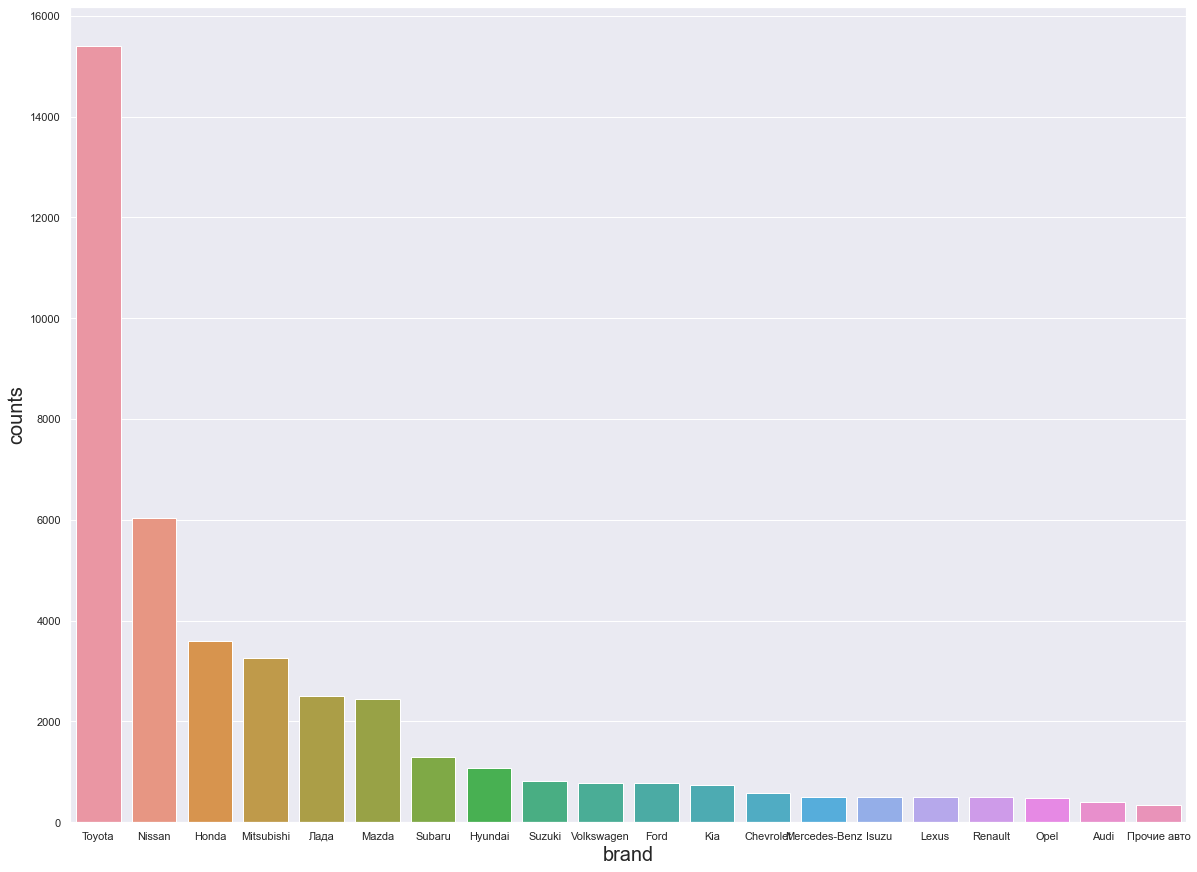

In [11]:
df_brands=df_processed.groupby("brand").size().reset_index(name='counts')
df_brands=df_brands.sort_values(by="counts",ascending=False)
display(df_brands)

#for top 20 brands by count of pairs
df_brands_top_20=df_brands.head(20)
display(df_brands_top_20)
sns.barplot(x=df_brands_top_20.brand,y=df_brands_top_20.counts)

,model,counts
313,Corolla,1315
252,Camry,1270
679,Mark II,823
1111,X-Trail,733
234,CR-V,651
...,...,...
163,Aurion,1
390,Element,1
396,Emgrand GT,1
1024,Tivoli XLV,1


,model,counts
313,Corolla,1315
252,Camry,1270
679,Mark II,823
1111,X-Trail,733
234,CR-V,651
619,Land Cruiser Prado,567
450,Forester,519
562,Ipsum,510
317,Corolla Fielder,496
844,RAV4,468


<AxesSubplot:xlabel='model', ylabel='counts'>

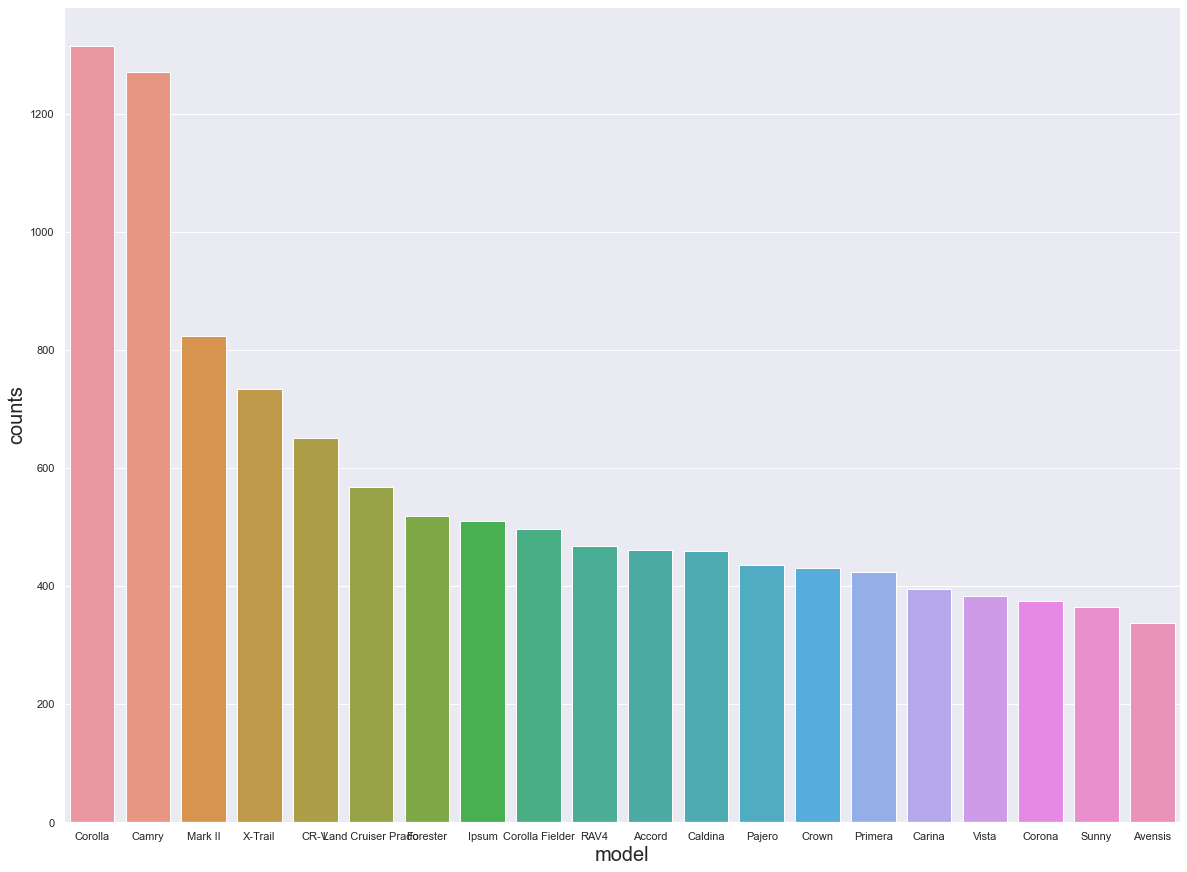

In [12]:
#The same for models
df_models=df_processed.groupby("model").size().reset_index(name='counts')
df_models=df_models.sort_values(by="counts",ascending=False)
display(df_models)

#for top 20 model by count of pairs
df_models_top_20=df_models.head(20)
display(df_models_top_20)
sns.barplot(x=df_models_top_20.model,y=df_models_top_20.counts)

,year,counts
30,2001,2536
37,2008,2350
27,1998,2339
29,2000,2297
28,1999,2279
31,2002,2105
36,2007,2053
32,2003,1923
26,1997,1815
35,2006,1744


,year,counts
11,1982,7
8,1979,4
6,1977,4
7,1978,3
10,1981,2
2,1972,2
1,1971,1
5,1976,1
4,1975,1
3,1973,1


,year,counts
30,2001,2536
37,2008,2350
27,1998,2339
29,2000,2297
28,1999,2279
31,2002,2105
36,2007,2053
32,2003,1923
26,1997,1815
35,2006,1744


<AxesSubplot:xlabel='year', ylabel='counts'>

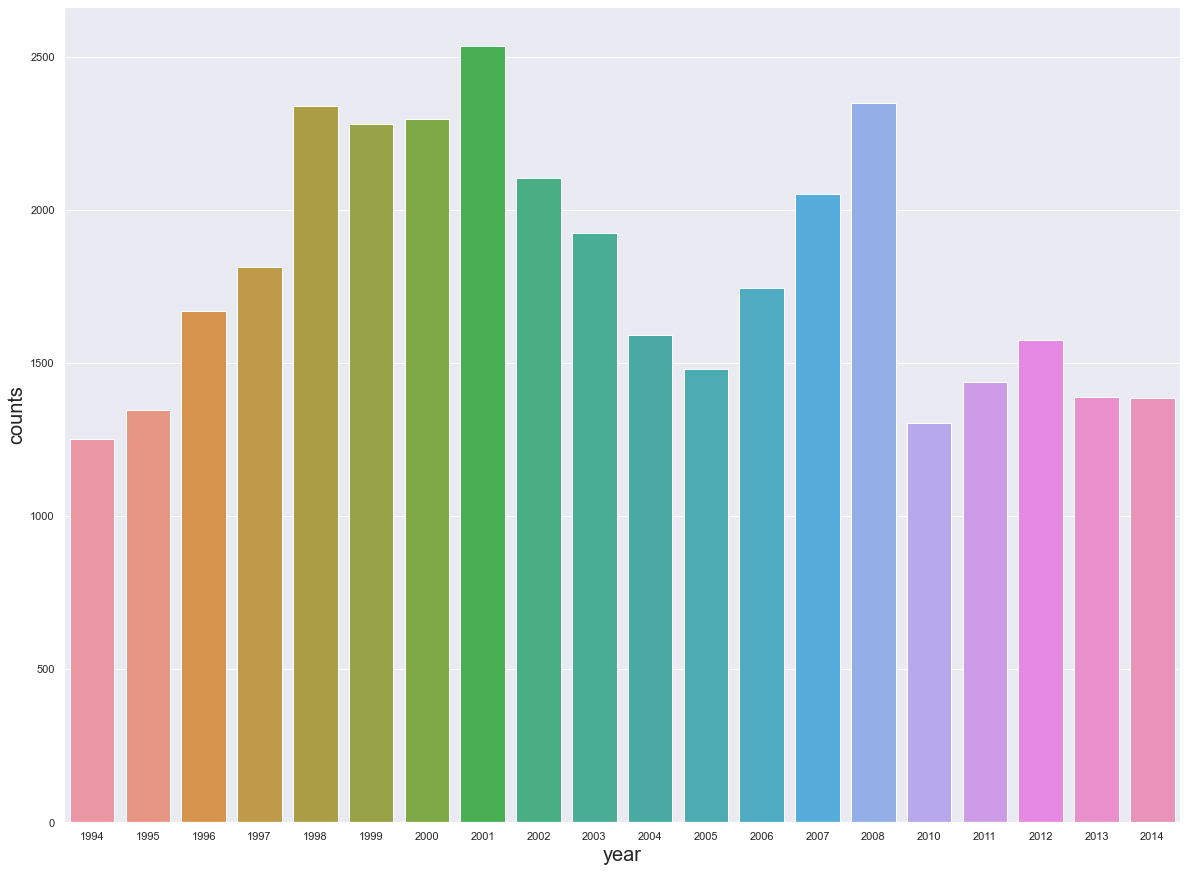

In [13]:
#The same for years
df_years=df_processed.groupby("year").size().reset_index(name='counts')
df_years=df_years.sort_values(by="counts",ascending=False)
display(df_years.head(10))
display(df_years.tail(10))


#for top 20 year by count of pairs
df_years_top_20=df_years.head(20)
display(df_years_top_20)
sns.barplot(x=df_years_top_20.year,y=df_years_top_20.counts)

In [14]:
df_brand_model=df_processed.groupby(["brand","model"]).size().reset_index(name='counts')
df_brand_model

,brand,model,counts
0,Acura,CL,1
1,Acura,CSX,1
2,Acura,ILX,1
3,Acura,MDX,13
4,Acura,RDX,2
...,...,...,...
1221,УАЗ,Патриот,120
1222,УАЗ,Пикап,5
1223,УАЗ,Профи,5
1224,УАЗ,УАЗ,10


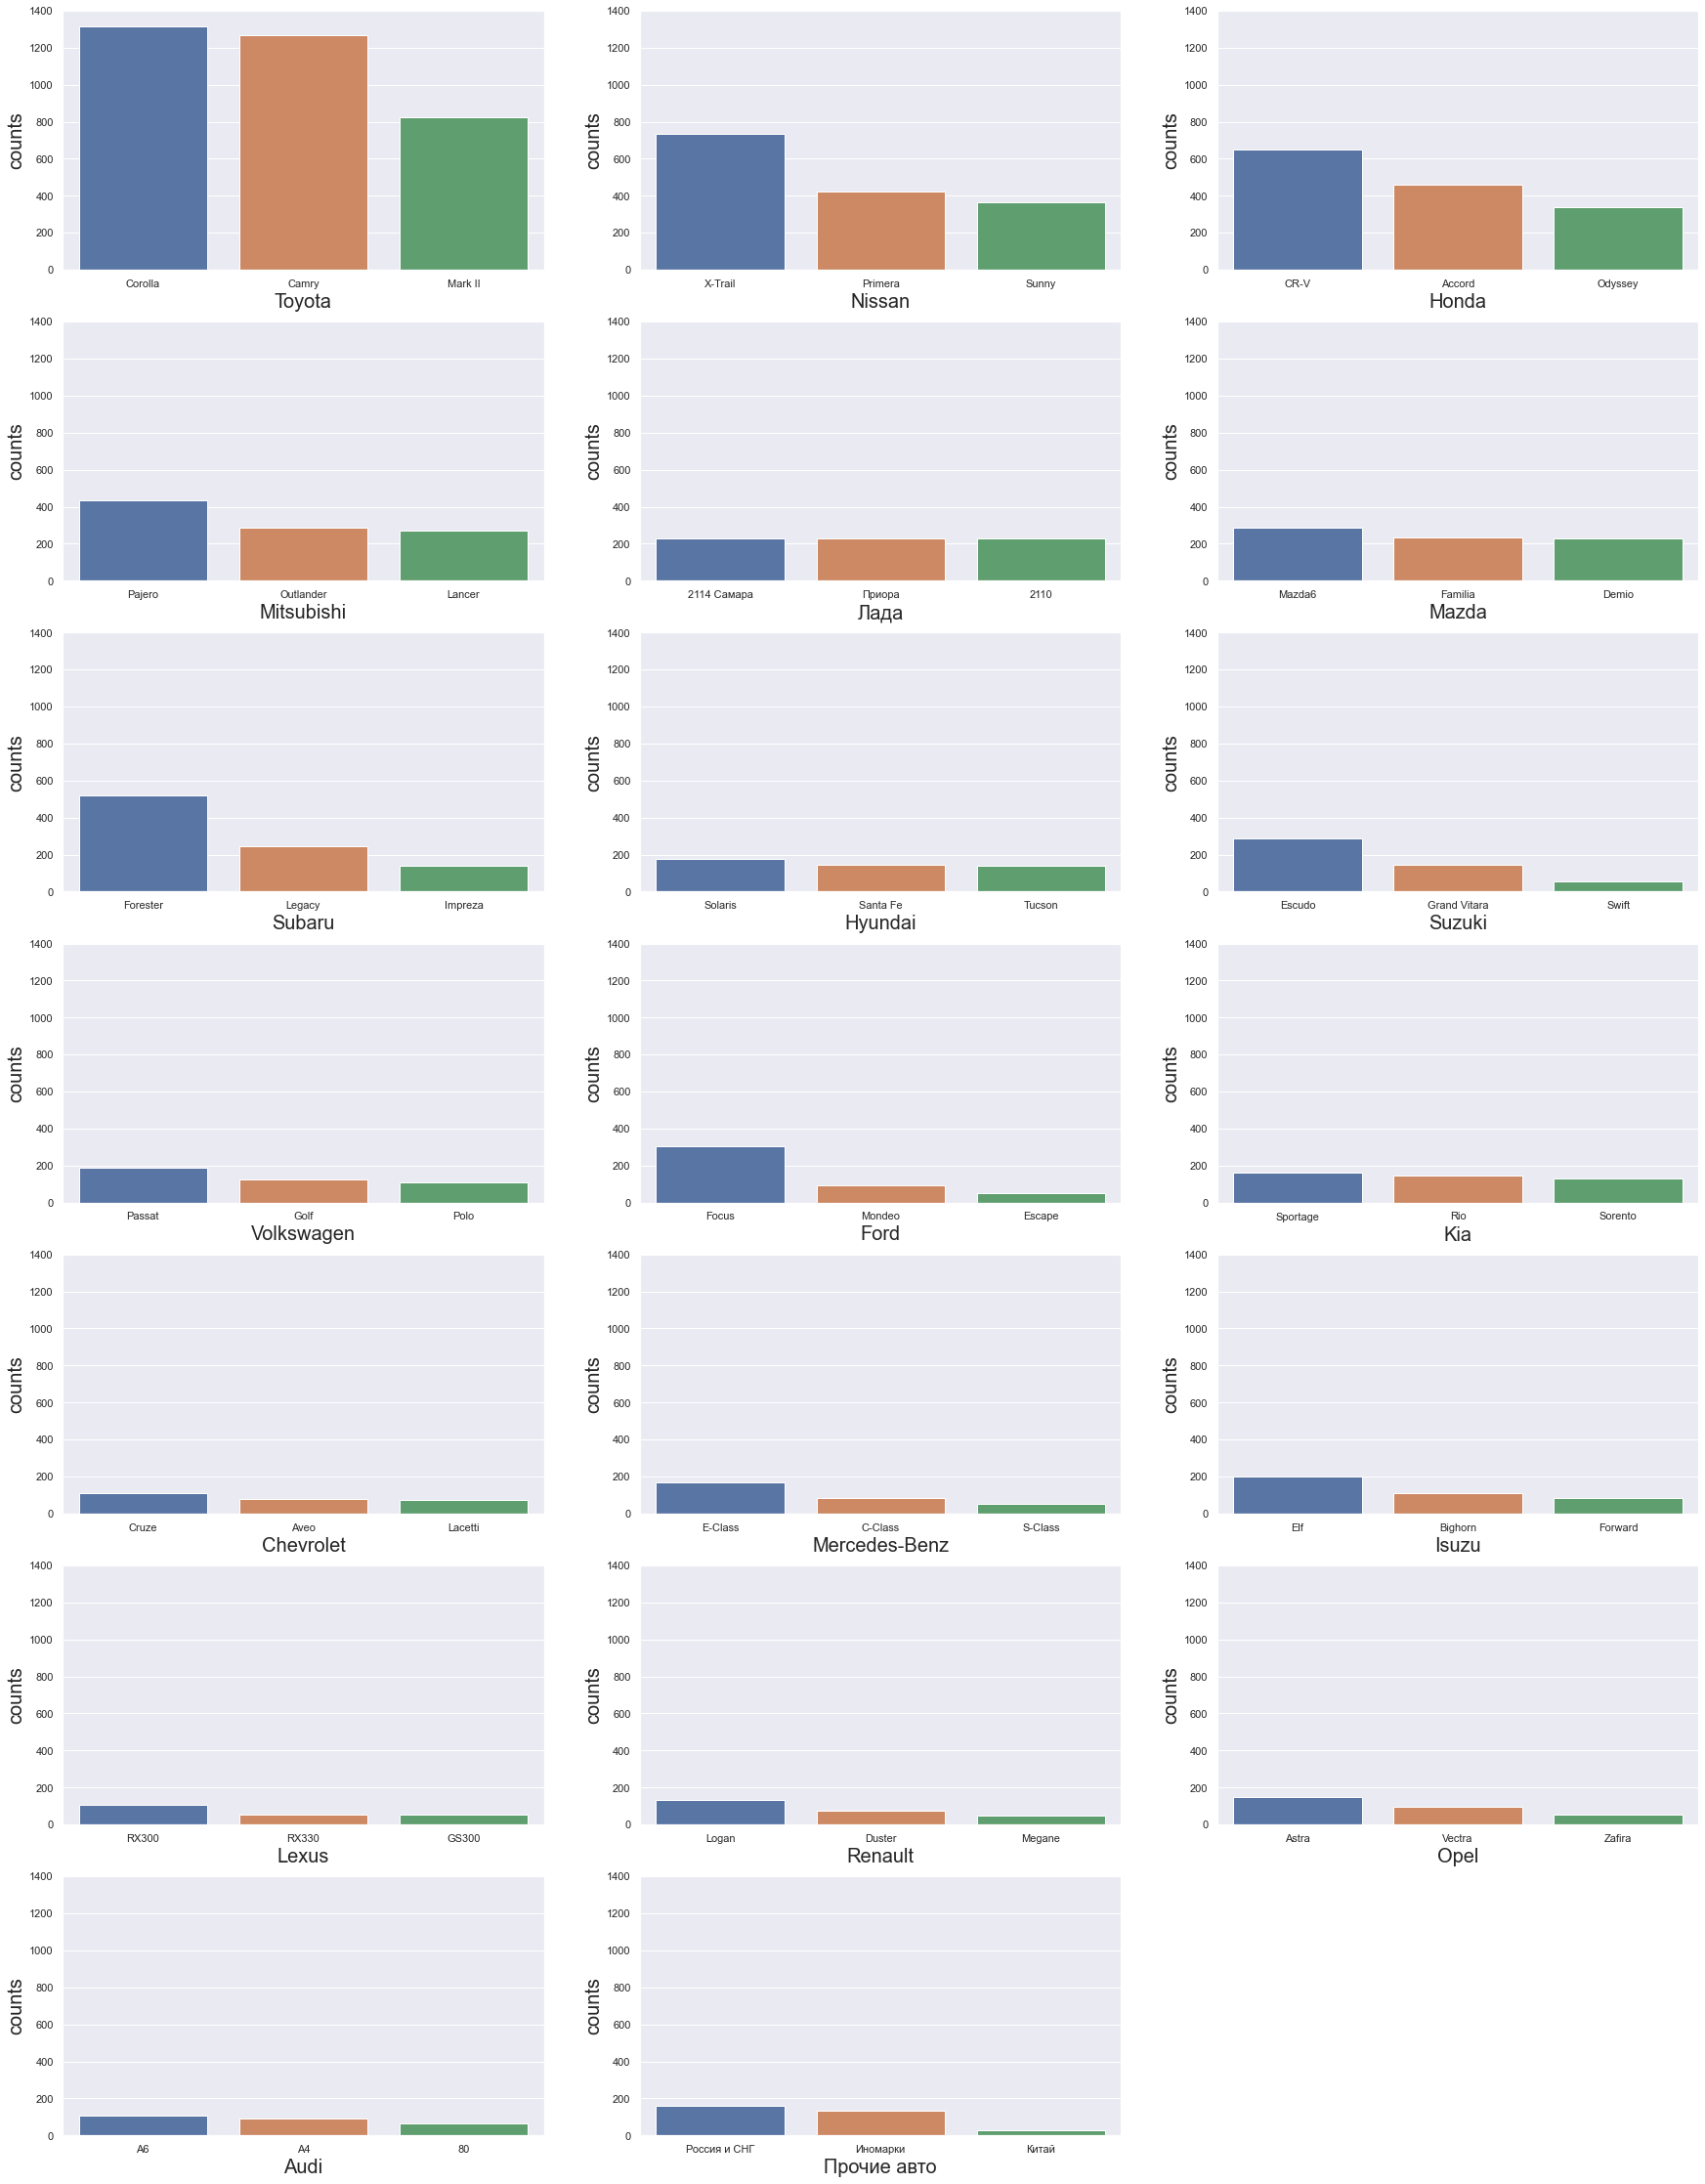

In [15]:
#Top 3 models for every brand from top 20
sns.set(rc={'figure.figsize':(30,40),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

for i in range(0,20):
    plt.subplot(7,3,i+1)

    brand_i=df_brands_top_20.iloc[i,:].brand

    brand_i_models=df_brand_model[df_brand_model.brand==brand_i].sort_values(by="counts",ascending=False).head(3)
    
    ax=sns.barplot(x=brand_i_models.model,y=brand_i_models.counts)
    ax.set_xlabel(brand_i)
    #fix y limit to compare counts
    ax.set_ylim(0,1400)

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})


In [16]:
df_brand_year=df_processed.groupby(["brand","year"]).size().reset_index(name='counts')
df_brand_year

,brand,year,counts
0,Acura,1994,1
1,Acura,2000,1
2,Acura,2002,2
3,Acura,2003,1
4,Acura,2004,1
...,...,...,...
1315,УАЗ,2016,7
1316,УАЗ,2017,20
1317,УАЗ,2018,12
1318,УАЗ,2019,5


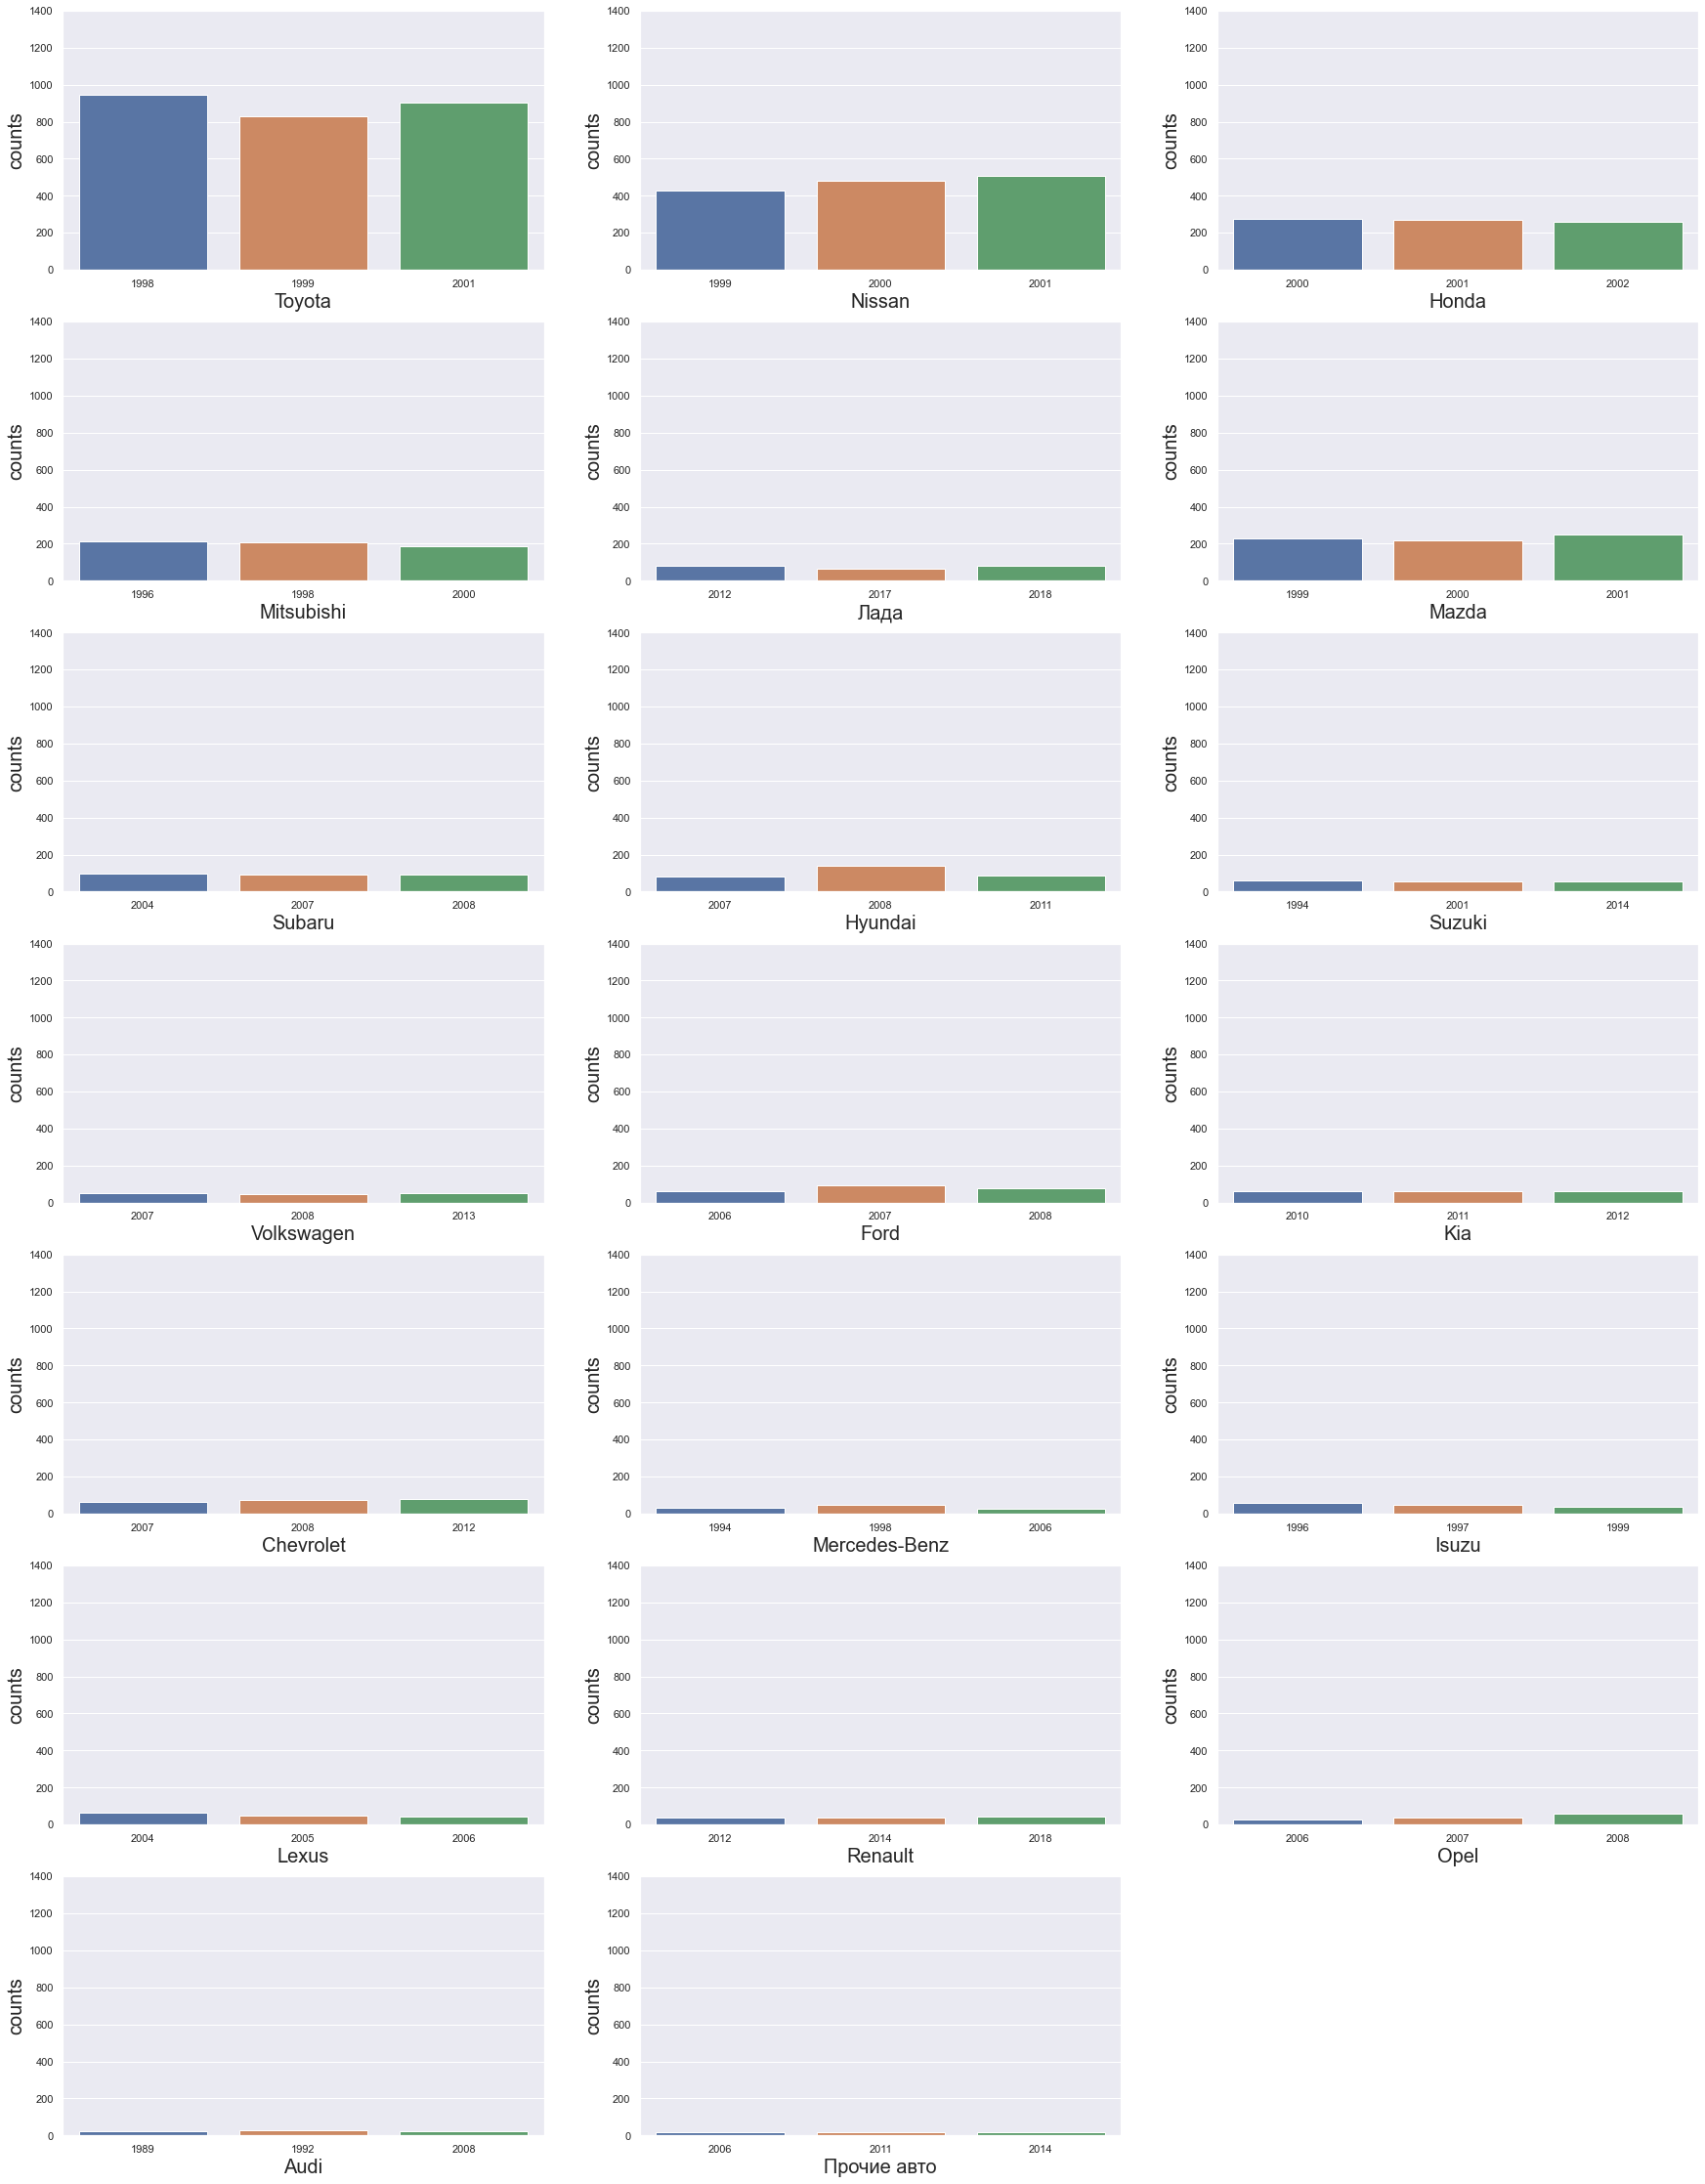

In [17]:
#Top 3 years for every brand from top 20
sns.set(rc={'figure.figsize':(30,40),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

for i in range(0,20):
    plt.subplot(7,3,i+1)

    brand_i=df_brands_top_20.iloc[i,:].brand

    brand_i_years=df_brand_year[df_brand_year.brand==brand_i].sort_values(by="counts",ascending=False).head(3)
    
    ax=sns.barplot(x=brand_i_years.year,y=brand_i_years.counts)
    ax.set_xlabel(brand_i)
    #fix y limit to compare counts
    ax.set_ylim(0,1400)

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

<h3>We want to get word frequency for tokenized lemmatizated words w/o stopwords and punctuation in problem and solution columns

In [18]:
#lemmatization
''' It requires at least 12 hours for my pc :(

m = Mystem()

print("problem_lemm:")
df_processed["problem_lemm"]=df_processed["problem"].swifter.apply(lambda x:m.lemmatize(x))

print("solution_lemm")
df_processed["solution_lemm"]=df_processed["solution"].swifter.apply(lambda x:m.lemmatize(x))
df_processed
'''

' It requires at least 12 hours for my pc :(\nm = Mystem()\n\nprint("problem_lemm:")\ndf_processed["problem_lemm"]=df_processed["problem"].swifter.apply(lambda x:m.lemmatize(x))\n\nprint("solution_lemm")\ndf_processed["solution_lemm"]=df_processed["solution"].swifter.apply(lambda x:m.lemmatize(x))\ndf_processed\n'

In [19]:
#russian stopwords and punctuation
stops=set(stopwords.words("russian")+list(string.punctuation))

df_processed["problem_tokens"]=df_processed["problem"].swifter.apply(lambda x:[i for i in word_tokenize(x.lower()) if i not in stops],axis=1)

df_processed["solution_tokens"]=df_processed["solution"].swifter.apply(lambda x:[i for i in word_tokenize(x.lower()) if i not in stops],axis=1)

df_processed

C:\Users\Oleg\Anaconda3\lib\site-packages\swifter\swifter.py:215: UserWarning: Axis keyword not necessary because applying on a Series.
  warnings.warn("Axis keyword not necessary because applying on a Series.")
Dask Apply: 100%|██████████| 24/24 [00:12<00:00,  1.98it/s]
C:\Users\Oleg\Anaconda3\lib\site-packages\swifter\swifter.py:215: UserWarning: Axis keyword not necessary because applying on a Series.
  warnings.warn("Axis keyword not necessary because applying on a Series.")
Dask Apply: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]


,problem,solution,brand,model,year,problem_tokens,solution_tokens
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема...",Kia,Sorento,2013,"[добрый, ...., подскажите, пожалуйста, причина...","[добрый, это, катализатор, проблема, нём, двиг..."
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...,Nissan,X-Trail,2005,"[снять, впускной, колектор, икстрейле, двс, qr...","[ручками, инструментом, обращаются, сервис, оп..."
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ...",Volkswagen,Golf,2007,"[здравствуйте, скажите, компрессор, кондиционе...","[здравствуйте, попробовать, поставить, оки, пр..."
3,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""...",Toyota,Crown,2001,"[неработает, сенсор, монитора, управления, печ...","[прочитал, одном, форуме, интересное, правило,..."
4,На сколько литров топливный бак,55 л,Toyota,Crown,2000,"[сколько, литров, топливный, бак]","[55, л]"
...,...,...,...,...,...,...,...
45907,Приветствую! Он так и должен работать или это...,Короб фильтра подтяни и забей. Это норм Подушк...,Nissan,Avenir,1997,"[приветствую, должен, работать, это, ненормаль...","[короб, фильтра, подтяни, забей, это, норм, по..."
45908,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать! Скорее всего не было конт...,BMW,3-Series,2004,"[авенсис, версо, 03, года, бензин, 1az-fe, слу...","[здравствовать, скорее, контакта, конденсат, о..."
45909,"Досталася Ипсум 2002гв 2,4л И так по порядку.....",И Вам доброго! 1. Одному Богу известно. 2. А м...,Mitsubishi,Colt,2003,"[досталася, ипсум, 2002гв, 2,4л, порядку, ...,...","[доброго, 1., одному, богу, известно, 2., всё-..."
45910,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...,Лада,2112,<NA>,"[машинах, разбираюсь, хочу, спросить, ниваводо...","[666_ghost-basters_666, 1, 151106709, говорят,..."


In [20]:
#count word frequency (total) by stack every word in one Series and count number of every token in it
counts_problem=df_processed.problem_tokens.swifter.apply(pd.Series).stack().value_counts().reset_index()
counts_problem.columns = ['word', 'frequency'] 
display(counts_problem)

Pandas Apply: 100%|██████████| 45912/45912 [00:31<00:00, 1471.89it/s] 


,word,frequency
0,подскажите,18662
1,пожалуйста,8993
2,всем,8893
3,здравствуйте,8792
4,машина,8466
...,...,...
97283,спасибобольшое,1
97284,наклеить,1
97285,дочего,1
97286,протыкать,1


In [32]:
#lemmatization of tokens
#We will create Mystem entity every time to use multithreading
counts_problem["word"]=counts_problem["word"].swifter.apply(Mystem().lemmatize)
counts_problem=counts_problem.groupby("word").agg(sum)

counts_problem

Pandas Apply:   0%|          | 318/97288 [05:00<25:29:16,  1.06it/s]


KeyboardInterrupt: 

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

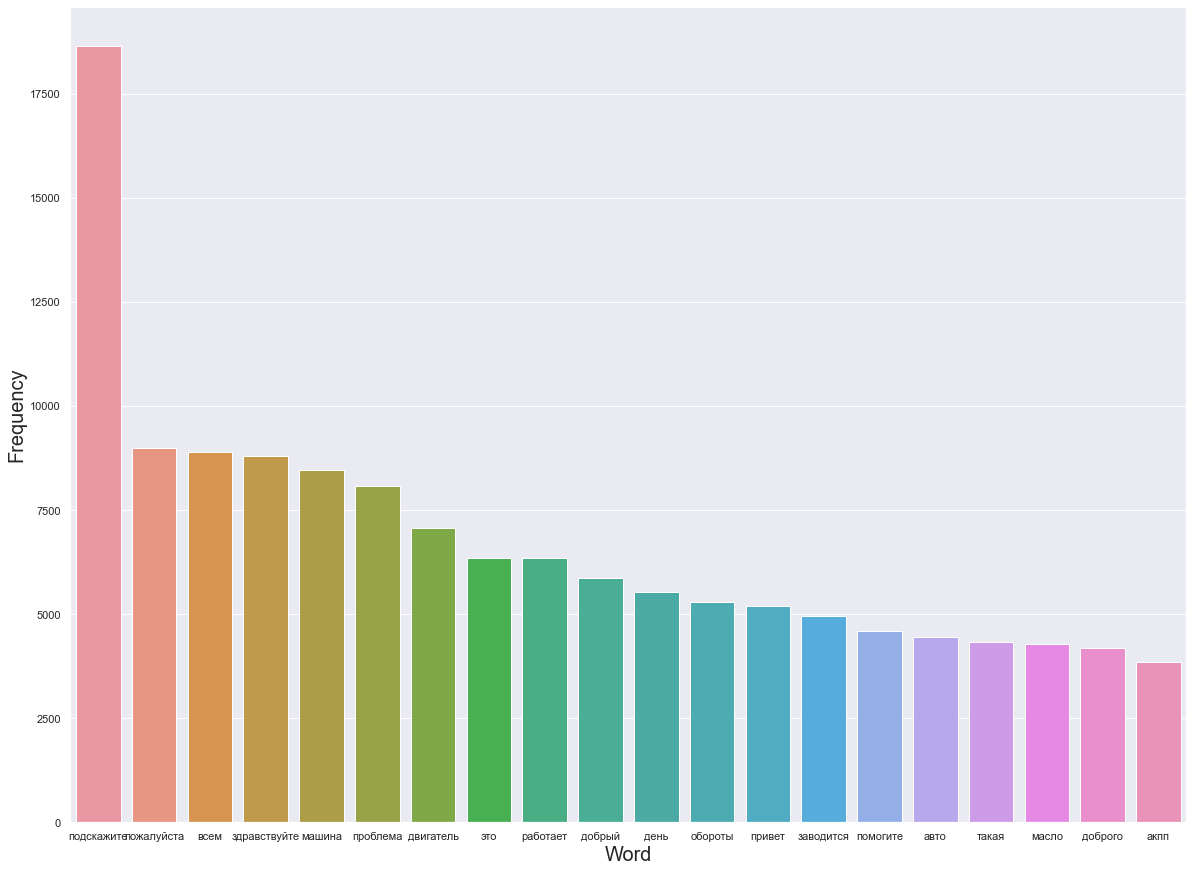

In [47]:
sns.barplot(x=counts_problem.head(20).Word,y=counts_problem.head(20).Frequency)

In [49]:
#count word frequency (total) by stack every word in one Series and count number of every token in it
counts_solution=df_processed.solution_tokens.swifter.apply(pd.Series).stack().value_counts().reset_index()
counts_solution.columns = ['Word', 'Frequency'] 
display(counts_solution)

Pandas Apply: 100%|██████████| 45912/45912 [00:30<00:00, 10622.01it/s]

In [ ]:
sns.barplot(x=counts_solution.head(20).Word,y=counts_solution.head(20).Frequency)

In [ ]:
#df_processed.to_csv("df_processed_drom")